In [2]:
import pandas as pd
df=pd.read_csv("flights.csv")
df

C:\Users\Bhuveeta Sarohi\AppData\Local\Temp\ipykernel_8144\366331677.py:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("flights.csv")


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#questions to ask
#1. What percentage of flights were canceled?
#2.  Which airlines had the highest cancellation rates?
#3. What are the top reasons for flight cancellations?
#4. Which airports have the highest number of canceled flights?
#5. What is the average delay time for each airline?
#6. How does flight delay vary across different times of the day?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [5]:
print(df.isnull().sum())

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64


In [3]:
categorial_cols=['ORIGIN_AIRPORT','DESTINATION_AIRPORT','AIRLINE']
for col in categorial_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

numeric_cols=['DEPARTURE_DELAY','ARRIVAL_DELAY','AIR_TIME','DISTANCE']
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [4]:
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY              0
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                     0
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY                0
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [8]:
df.drop(columns=['TAIL_NUMBER','CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY',
                 'WEATHER_DELAY'], inplace=True)

In [10]:
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015,1,1,4,AS,98,ANC,SEA,5,2354.0,...,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0
1,2015,1,1,4,AA,2336,LAX,PBI,10,2.0,...,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0
2,2015,1,1,4,US,840,SFO,CLT,20,18.0,...,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0
3,2015,1,1,4,AA,258,LAX,MIA,20,15.0,...,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0
4,2015,1,1,4,AS,135,SEA,ANC,25,24.0,...,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,LAX,BOS,2359,2355.0,...,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0
5819075,2015,12,31,4,B6,745,JFK,PSE,2359,2355.0,...,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0
5819076,2015,12,31,4,B6,1503,JFK,SJU,2359,2350.0,...,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0
5819077,2015,12,31,4,B6,333,MCO,SJU,2359,2353.0,...,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0


In [11]:
df.isna().sum()

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME          86153
DEPARTURE_DELAY             0
TAXI_OUT                89047
WHEELS_OFF              89047
SCHEDULED_TIME              6
ELAPSED_TIME           105071
AIR_TIME                    0
DISTANCE                    0
WHEELS_ON               92513
TAXI_IN                 92513
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME            92513
ARRIVAL_DELAY               0
DIVERTED                    0
CANCELLED                   0
dtype: int64

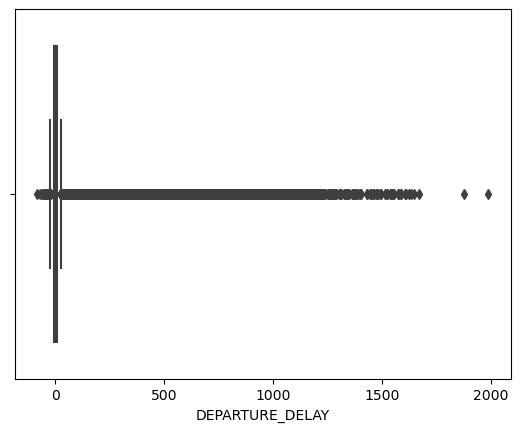

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['DEPARTURE_DELAY'])
plt.show()

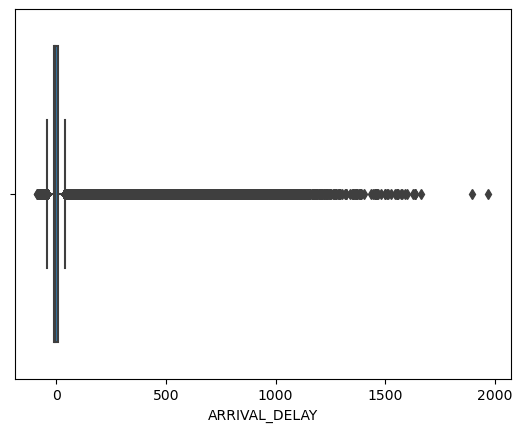

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['ARRIVAL_DELAY'])
plt.show()

In [11]:
def remove_outliers(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
df=remove_outliers(df, 'DEPARTURE_DELAY')
df=remove_outliers(df, 'ARRIVAL_DELAY')
df=remove_outliers(df, 'TAXI_IN')
df=remove_outliers(df, 'TAXI_OUT')
df=remove_outliers(df, 'DISTANCE')

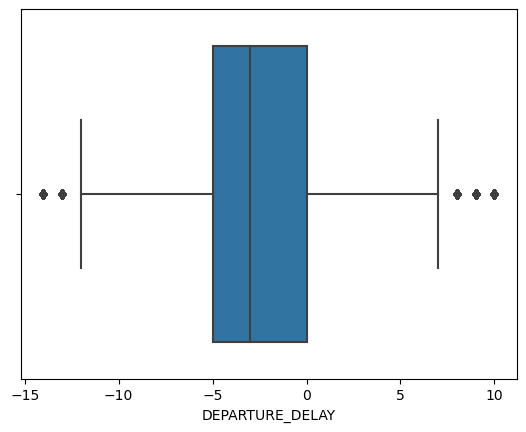

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['DEPARTURE_DELAY'])
plt.show()

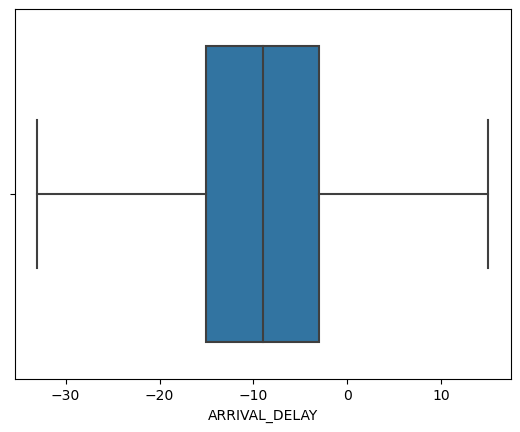

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['ARRIVAL_DELAY'])
plt.show()

In [17]:
df.duplicated().sum()

0

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
print(df['AIRLINE'].unique())
print(df['ORIGIN_AIRPORT'].unique())

['AS' 'DL' 'NK' 'AA' 'UA' 'US' 'B6' 'HA' 'OO' 'EV' 'F9' 'WN' 'MQ' 'VX']
['ANC' 'SEA' 'SFO' 'LAS' 'DEN' 'LAX' 'SLC' 'PDX' 'FAI' 'PHX' 'SJU' 'PBG'
 'IAG' 'PSE' 'BQN' 'ORD' 'GEG' 'HNL' 'ONT' 'MCO' 'BOS' 'ABR' 'MKE' 'BRO'
 'VPS' 'BOI' 'PHL' 'SBN' 'EUG' 'IAD' 'BUF' 'PWM' 'CRP' 'PIA' 'AUS' 'MCI'
 'ATL' 'JAX' 'MSN' 'DCA' 'SAT' 'JFK' 'DFW' 'CHS' 'MSP' 'SBA' 'IND' 'GSP'
 'BDL' 'RIC' 'OMA' 'RDM' 'FLL' 'CID' 'TPA' 'SYR' 'ROC' 'TYR' 'LAN' 'GSO'
 'EWR' 'PBI' 'RSW' 'OAK' 'PVD' 'RNO' 'PIT' 'IAH' 'MIA' 'TUL' 'LIT' 'MSY'
 'LGA' 'ATW' 'PNS' 'MEM' 'BWI' 'MHT' 'CLT' 'TYS' 'GRB' 'ABE' 'JAN' 'OAJ'
 'ERI' 'LEX' 'CWA' 'CLE' 'TTN' 'CVG' 'BHM' 'TUS' 'EAU' 'FSD' 'FAT' 'SPI'
 'COD' 'CMH' 'PSC' 'DAL' 'PAH' 'MRY' 'ESC' 'MFR' 'CAE' 'DTW' 'STL' 'GCC'
 'OGG' 'BNA' 'GUC' 'ORF' 'MOT' 'KOA' 'HOU' 'MOB' 'SAN' 'PIB' 'MGM' 'SBP'
 'ITO' 'SMF' 'SJC' 'BTR' 'PSP' 'HLN' 'BZN' 'MDW' 'RDU' 'MDT' 'SCE' 'COS'
 'LIH' 'TWF' 'BPT' 'GPT' 'BFL' 'HPN' 'MLB' 'CIU' 'CAK' 'BLI' 'SHV' 'MLU'
 'SNA' 'ALB' 'CMI' 'GTF' 'EKO' 'LGB' 'AVL' 'XNA' 'HY

In [14]:
df['AIRLINE']=df['AIRLINE'].str.strip().str.upper()
df['ORIGIN_AIRPORT']=df['ORIGIN_AIRPORT'].str.strip().str.upper()
df['DESTINATION_AIRPORT']=df['DESTINATION_AIRPORT'].str.strip().str.upper()

In [21]:
print(df['DIVERTED'].unique())
print(df['CANCELLED'].unique())

[0 1]
[0]


In [15]:
df['FLIGHT_NUMBER']=df['FLIGHT_NUMBER'].astype(str)
df['DATE']=pd.to_datetime(df[['YEAR','MONTH','DAY']])

In [23]:
df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,...,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,DATE
count,4098013.0,4.098013e+06,4.098013e+06,4.098013e+06,4.098013e+06,4.098013e+06,4.098013e+06,4.098013e+06,4.098013e+06,4.098013e+06,...,4.098013e+06,4.098013e+06,4.098013e+06,4.098013e+06,4.098013e+06,4.098013e+06,4.098013e+06,4.098013e+06,4098013.0,4098013
mean,2015.0,6.595992e+00,1.572677e+01,3.942862e+00,1.298024e+03,1.293188e+03,-8.506893e-01,1.416215e+01,1.314554e+03,1.263960e+02,...,9.904718e+01,7.035032e+02,1.449697e+03,6.470139e+00,1.466359e+03,1.455934e+03,-7.525872e+00,1.730107e-03,0.0,2015-07-04 02:38:57.239435520
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-2.300000e+01,1.000000e+00,1.000000e+00,1.800000e+01,...,7.000000e+00,3.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-3.600000e+01,0.000000e+00,0.0,2015-01-01 00:00:00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,9.020000e+02,9.010000e+02,-5.000000e+00,1.000000e+01,9.150000e+02,8.300000e+01,...,5.800000e+01,3.560000e+02,1.045000e+03,4.000000e+00,1.057000e+03,1.049000e+03,-1.500000e+01,0.000000e+00,0.0,2015-04-07 00:00:00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.257000e+03,1.255000e+03,-2.000000e+00,1.300000e+01,1.308000e+03,1.150000e+02,...,8.800000e+01,6.020000e+02,1.438000e+03,6.000000e+00,1.450000e+03,1.443000e+03,-8.000000e+00,0.000000e+00,0.0,2015-07-05 00:00:00
75%,2015.0,1.000000e+01,2.300000e+01,6.000000e+00,1.705000e+03,1.706000e+03,1.000000e+00,1.700000e+01,1.719000e+03,1.600000e+02,...,1.310000e+02,9.670000e+02,1.840000e+03,8.000000e+00,1.850000e+03,1.845000e+03,-1.000000e+00,0.000000e+00,0.0,2015-10-02 00:00:00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,2.359000e+03,2.400000e+03,2.500000e+01,2.800000e+01,2.400000e+03,3.370000e+02,...,3.270000e+02,2.039000e+03,2.400000e+03,1.600000e+01,2.359000e+03,2.400000e+03,2.300000e+01,1.000000e+00,0.0,2015-12-31 00:00:00
std,0.0,3.388810e+00,8.767242e+00,1.987662e+00,4.788842e+02,4.825269e+02,7.233531e+00,4.987629e+00,4.827265e+02,5.524003e+01,...,5.281316e+01,4.393353e+02,4.930664e+02,3.016596e+00,4.951595e+02,4.953780e+02,1.082319e+01,4.155856e-02,0.0,NaN


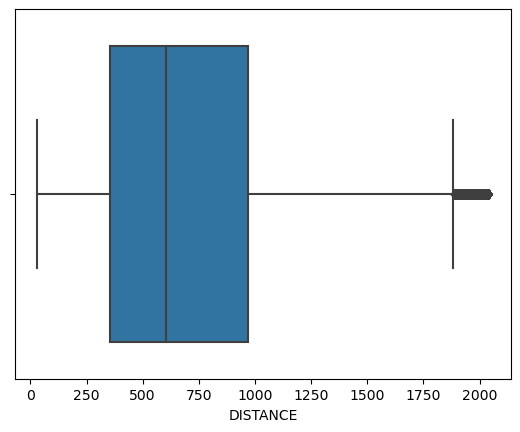

In [24]:
sns.boxplot(x=df['DISTANCE'])
plt.show()

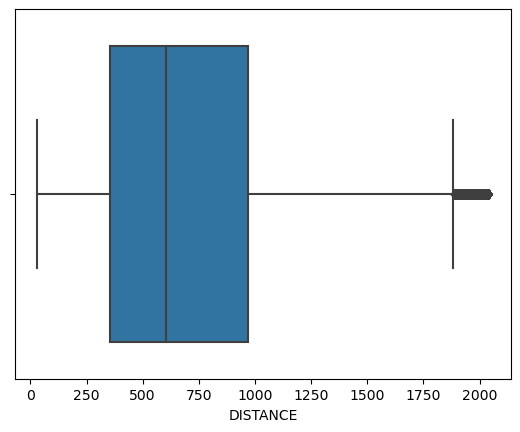

In [25]:
#after removing outliers
sns.boxplot(x=df['DISTANCE'])
plt.show()

In [16]:

df['DEPARTURE_TIME'].fillna(df['DEPARTURE_TIME'].median(), inplace=True)
df['DEPARTURE_DELAY'].fillna(df['DEPARTURE_DELAY'].median(), inplace=True)
df['AIR_TIME'].fillna(df['AIR_TIME'].median(), inplace=True)
df['ELAPSED_TIME'].fillna(df['ELAPSED_TIME'].median(), inplace=True)
df['ARRIVAL_TIME'].fillna(df['ARRIVAL_TIME'].median(), inplace=True)
df['ARRIVAL_DELAY'].fillna(df['ARRIVAL_DELAY'].median(), inplace=True)
df['TAXI_OUT'].fillna(df['TAXI_OUT'].median(), inplace=True)
df['TAXI_IN'].fillna(df['TAXI_IN'].median(), inplace=True)
df['WHEELS_OFF'].fillna(df['WHEELS_OFF'].median(), inplace=True)
df['WHEELS_ON'].fillna(df['WHEELS_ON'].median(), inplace=True)

In [27]:
df.to_csv("cleaned_flight_data.csv", index=False)

In [28]:
print("dataset shape:", df.shape)
print("dataset columns:", df.columns)

dataset shape: (4098013, 25)
dataset columns: Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'DATE'],
      dtype='object')


In [29]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 4098013 entries, 0 to 5819078
Data columns (total 25 columns):
 #   Column               Dtype         
---  ------               -----         
 0   YEAR                 int64         
 1   MONTH                int64         
 2   DAY                  int64         
 3   DAY_OF_WEEK          int64         
 4   AIRLINE              object        
 5   FLIGHT_NUMBER        object        
 6   ORIGIN_AIRPORT       object        
 7   DESTINATION_AIRPORT  object        
 8   SCHEDULED_DEPARTURE  int64         
 9   DEPARTURE_TIME       float64       
 10  DEPARTURE_DELAY      float64       
 11  TAXI_OUT             float64       
 12  WHEELS_OFF           float64       
 13  SCHEDULED_TIME       float64       
 14  ELAPSED_TIME         float64       
 15  AIR_TIME             float64       
 16  DISTANCE             int64         
 17  WHEELS_ON            float64       
 18  TAXI_IN              float64       
 19  SCHEDULED_ARRIVAL    int64

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
ORIGIN_AIRPORT         350362
DESTINATION_AIRPORT    350362
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME              0
DEPARTURE_DELAY             0
TAXI_OUT                    0
WHEELS_OFF                  0
SCHEDULED_TIME              0
ELAPSED_TIME                0
AIR_TIME                    0
DISTANCE                    0
WHEELS_ON                   0
TAXI_IN                     0
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME                0
ARRIVAL_DELAY               0
DIVERTED                    0
CANCELLED                   0
DATE                        0
dtype: int64

In [30]:
print(df['AIRLINE'].value_counts())
print(df['ORIGIN_AIRPORT'].value_counts())

AIRLINE
WN    992180
DL    655151
AA    466022
OO    438478
EV    419785
UA    292083
MQ    193932
B6    166524
US    127354
AS    119353
NK     75098
F9     63676
HA     57812
VX     30565
Name: count, dtype: int64
ORIGIN_AIRPORT
ATL      270145
ORD      192110
DFW      176191
DEN      144818
IAH      107530
          ...  
11097         1
10581         1
15048         1
11503         1
12265         1
Name: count, Length: 618, dtype: int64


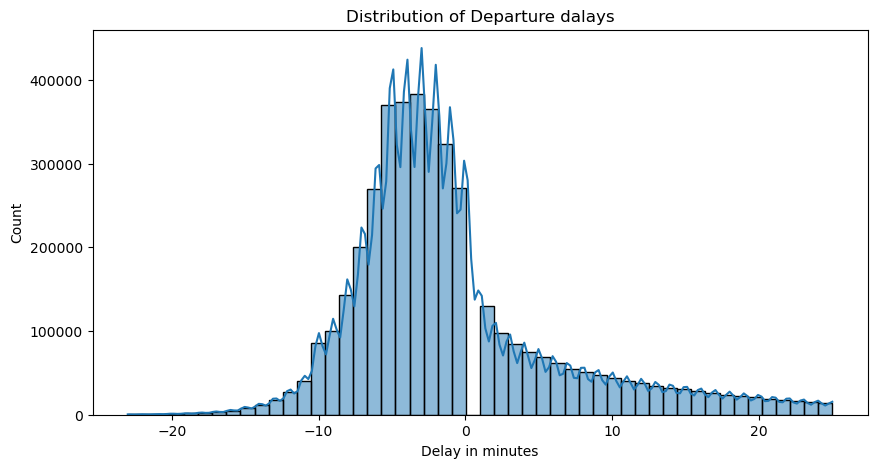

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(df['DEPARTURE_DELAY'],bins=50,kde=True)
plt.title("Distribution of Departure dalays")
plt.xlabel("Delay in minutes")
plt.show()

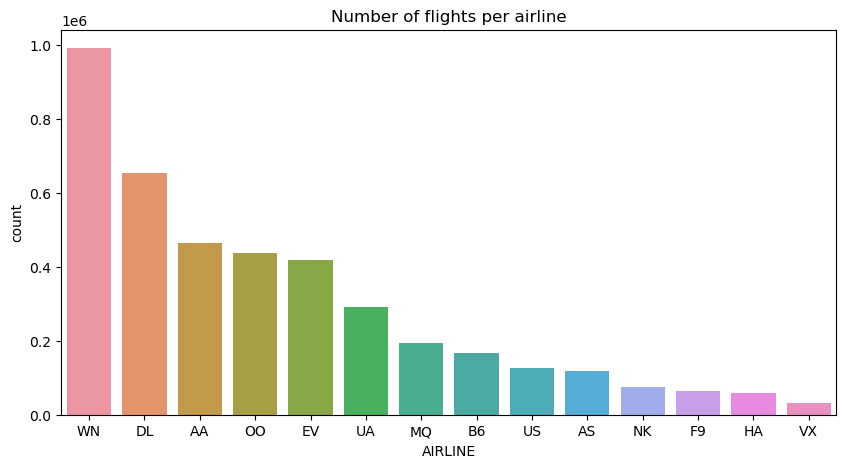

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['AIRLINE'],order=df['AIRLINE'].value_counts().index)
plt.title("Number of flights per airline")
plt.show()

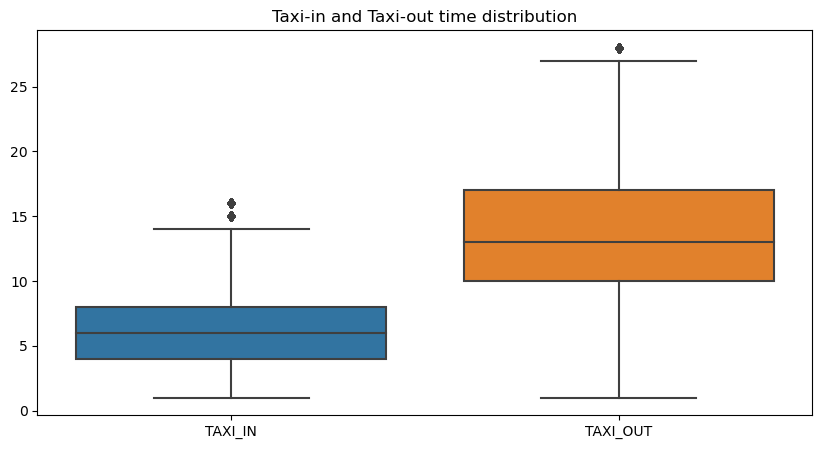

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['TAXI_IN','TAXI_OUT']])
plt.title("Taxi-in and Taxi-out time distribution")
plt.show()

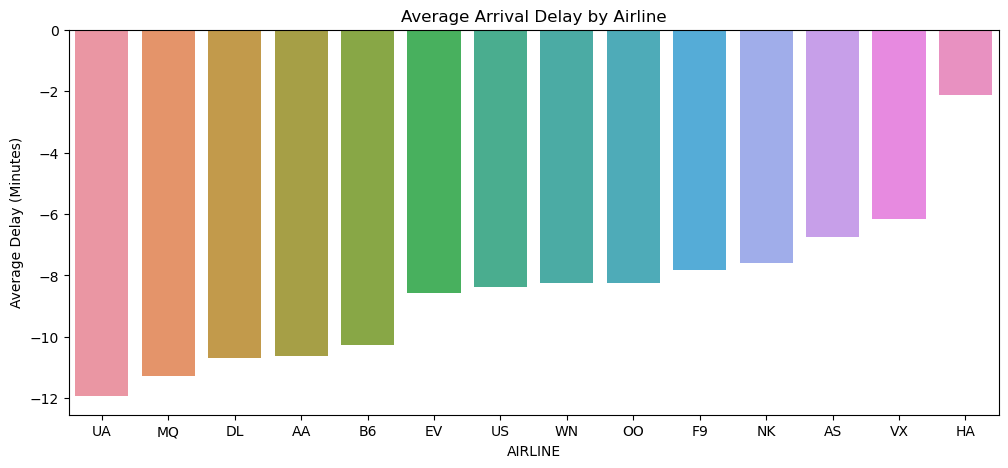

In [21]:
airline_delays = df.groupby('AIRLINE')['ARRIVAL_DELAY'].mean().sort_values()
plt.figure(figsize=(12,5))
sns.barplot(x=airline_delays.index, y=airline_delays.values)
plt.title("Average Arrival Delay by Airline")
plt.ylabel("Average Delay (Minutes)")
plt.show()

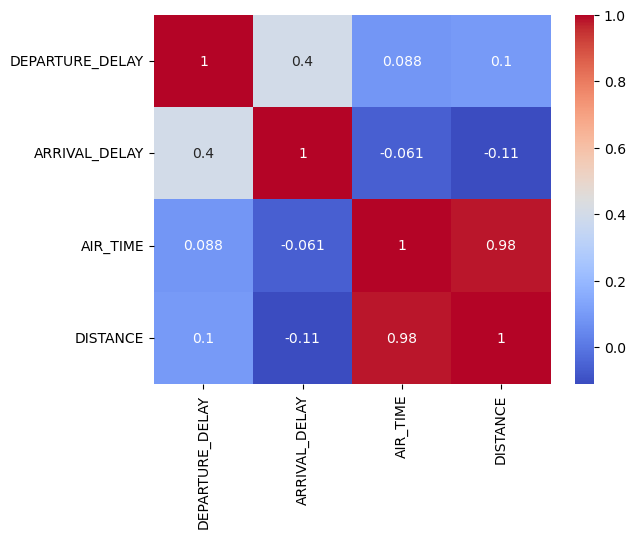

In [25]:
selected_columns = ['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'AIR_TIME', 'DISTANCE']
numeric_df = df[selected_columns]
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()